**EDA on Diabetes Dataset**


In [682]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [754]:

df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [685]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [686]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [687]:
df.info()
# rows,columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

# Data Visualization

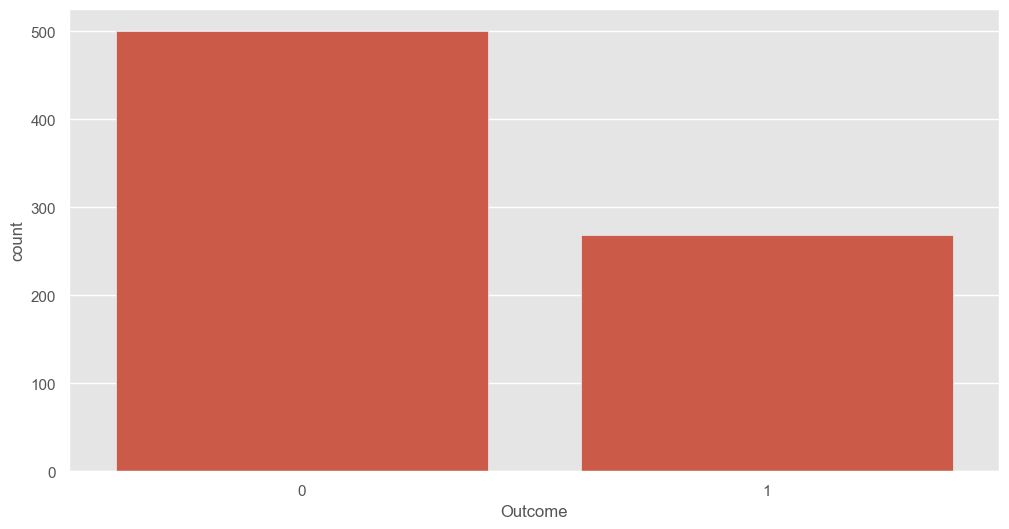

In [688]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Outcome', data = df)
plt.show()

* Handling Missing Values *

In [689]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [691]:
# percentage distribution for diabetes and on diabetes patients
# 0 = non diabetic 
# 1 = diabetic
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [692]:
# Checking null values
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [693]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [694]:
# median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]
   

In [695]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [696]:
df.head() 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

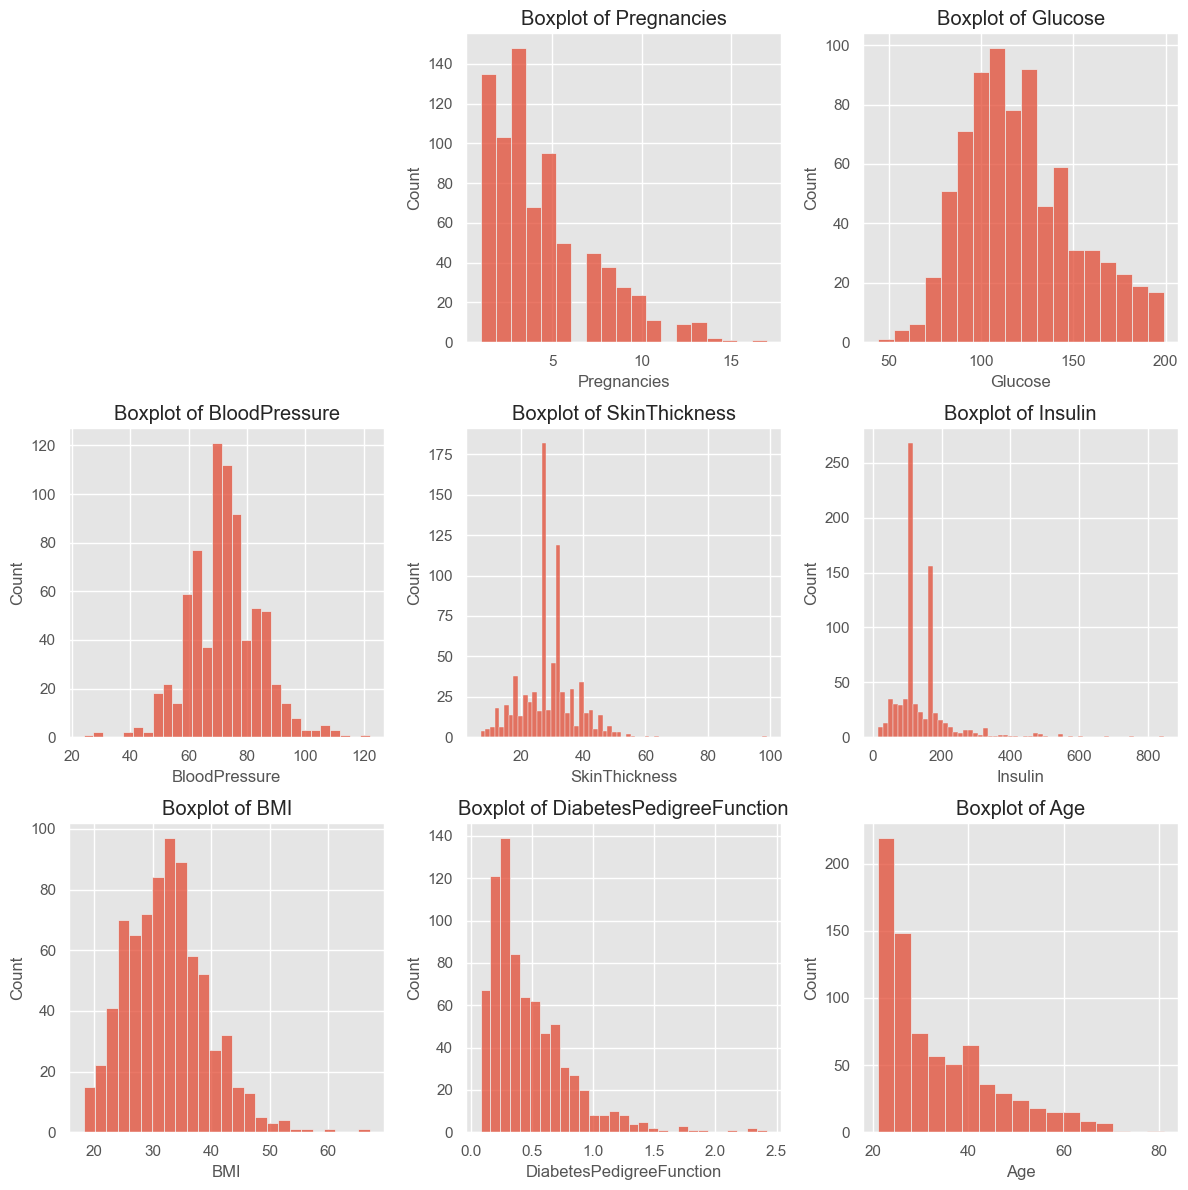

In [697]:
plt.figure(figsize=(12, 12))  
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(numerical_columns, 1):  # Enumerate starts at 1
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid for plots
    sns.histplot(x= col, data =df)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

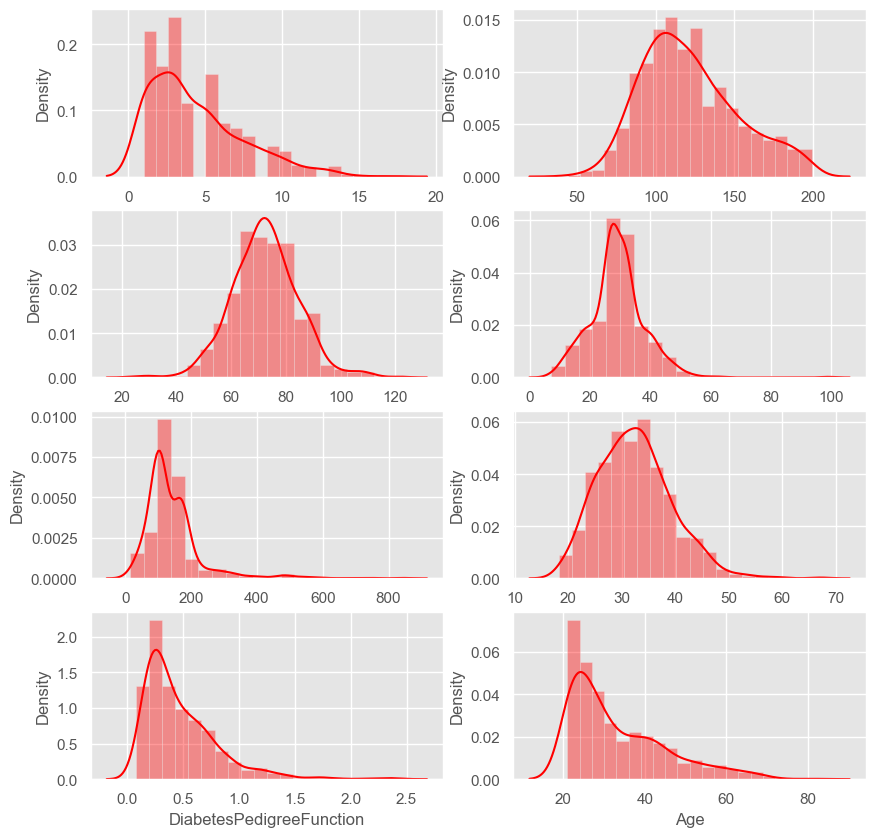

In [698]:
# density graph
fig,ax = plt.subplots(4,2,figsize=(10,10))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")


In [699]:

df.corr()


Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.176302       0.256749       0.141004   
Glucose                      0.176302  1.000000       0.225141       0.229289   
BloodPressure                0.256749  0.225141       1.000000       0.199349   
SkinThickness                0.141004  0.229289       0.199349       1.000000   
Insulin                      0.079835  0.490015       0.070128       0.200129   
BMI                          0.115098  0.236171       0.286399       0.566086   
DiabetesPedigreeFunction     0.000826  0.138353      -0.001443       0.106280   
Age                          0.527049  0.268910       0.325135       0.129537   
Outcome                      0.291270  0.495990       0.174469       0.295138   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.079835  0.115098                  0.000826   
Glucose                   0.490015  0.236171                  0.138353   
BloodPressure             0.070128  0.286399                 -0.001443   
SkinThickness             0.200129  0.566086                  0.106280   
Insulin                   1.000000  0.238443                  0.146878   
BMI                       0.238443  1.000000                  0.152771   
DiabetesPedigreeFunction  0.146878  0.152771                  1.000000   
Age                       0.123629  0.027849                  0.033561   
Outcome                   0.377081  0.315577                  0.173844   

                               Age   Outcome  
Pregnancies               0.527049  0.291270  
Glucose                   0.268910  0.495990  
BloodPressure             0.325135  0.174469  
SkinThickness             0.129537  0.295138  
Insulin                   0.123629  0.377081  
BMI                       0.027849  0.315577  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

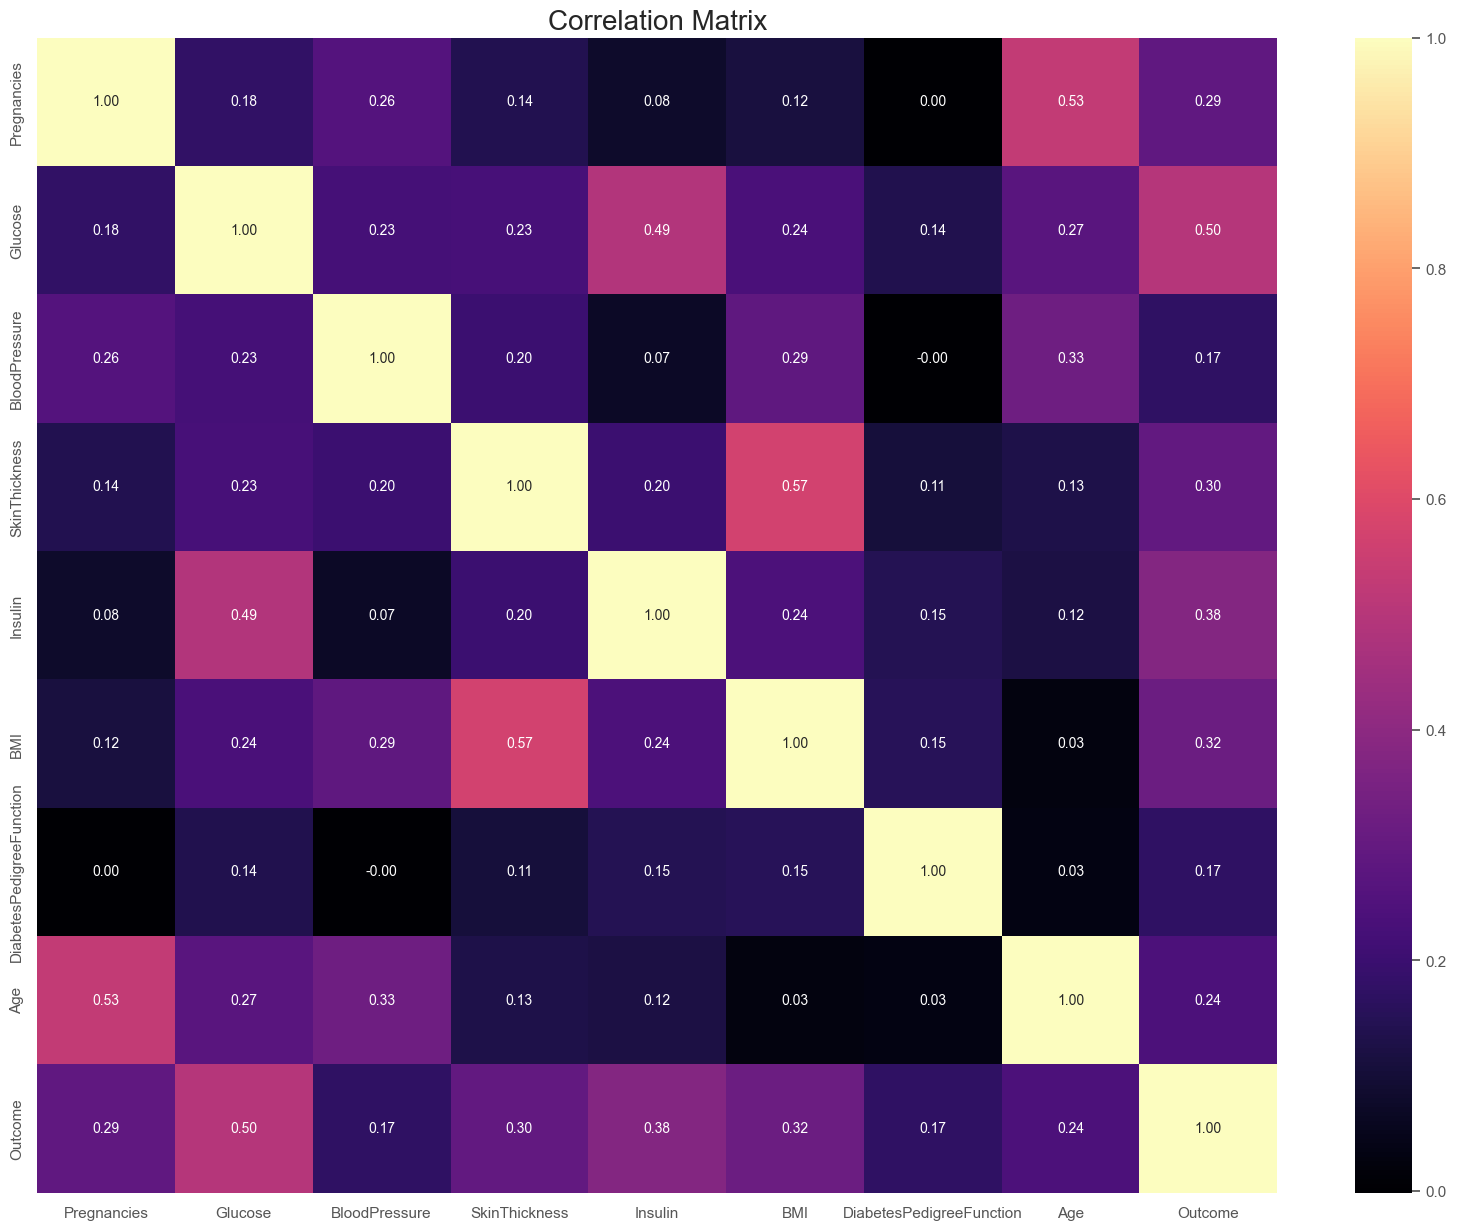

In [700]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

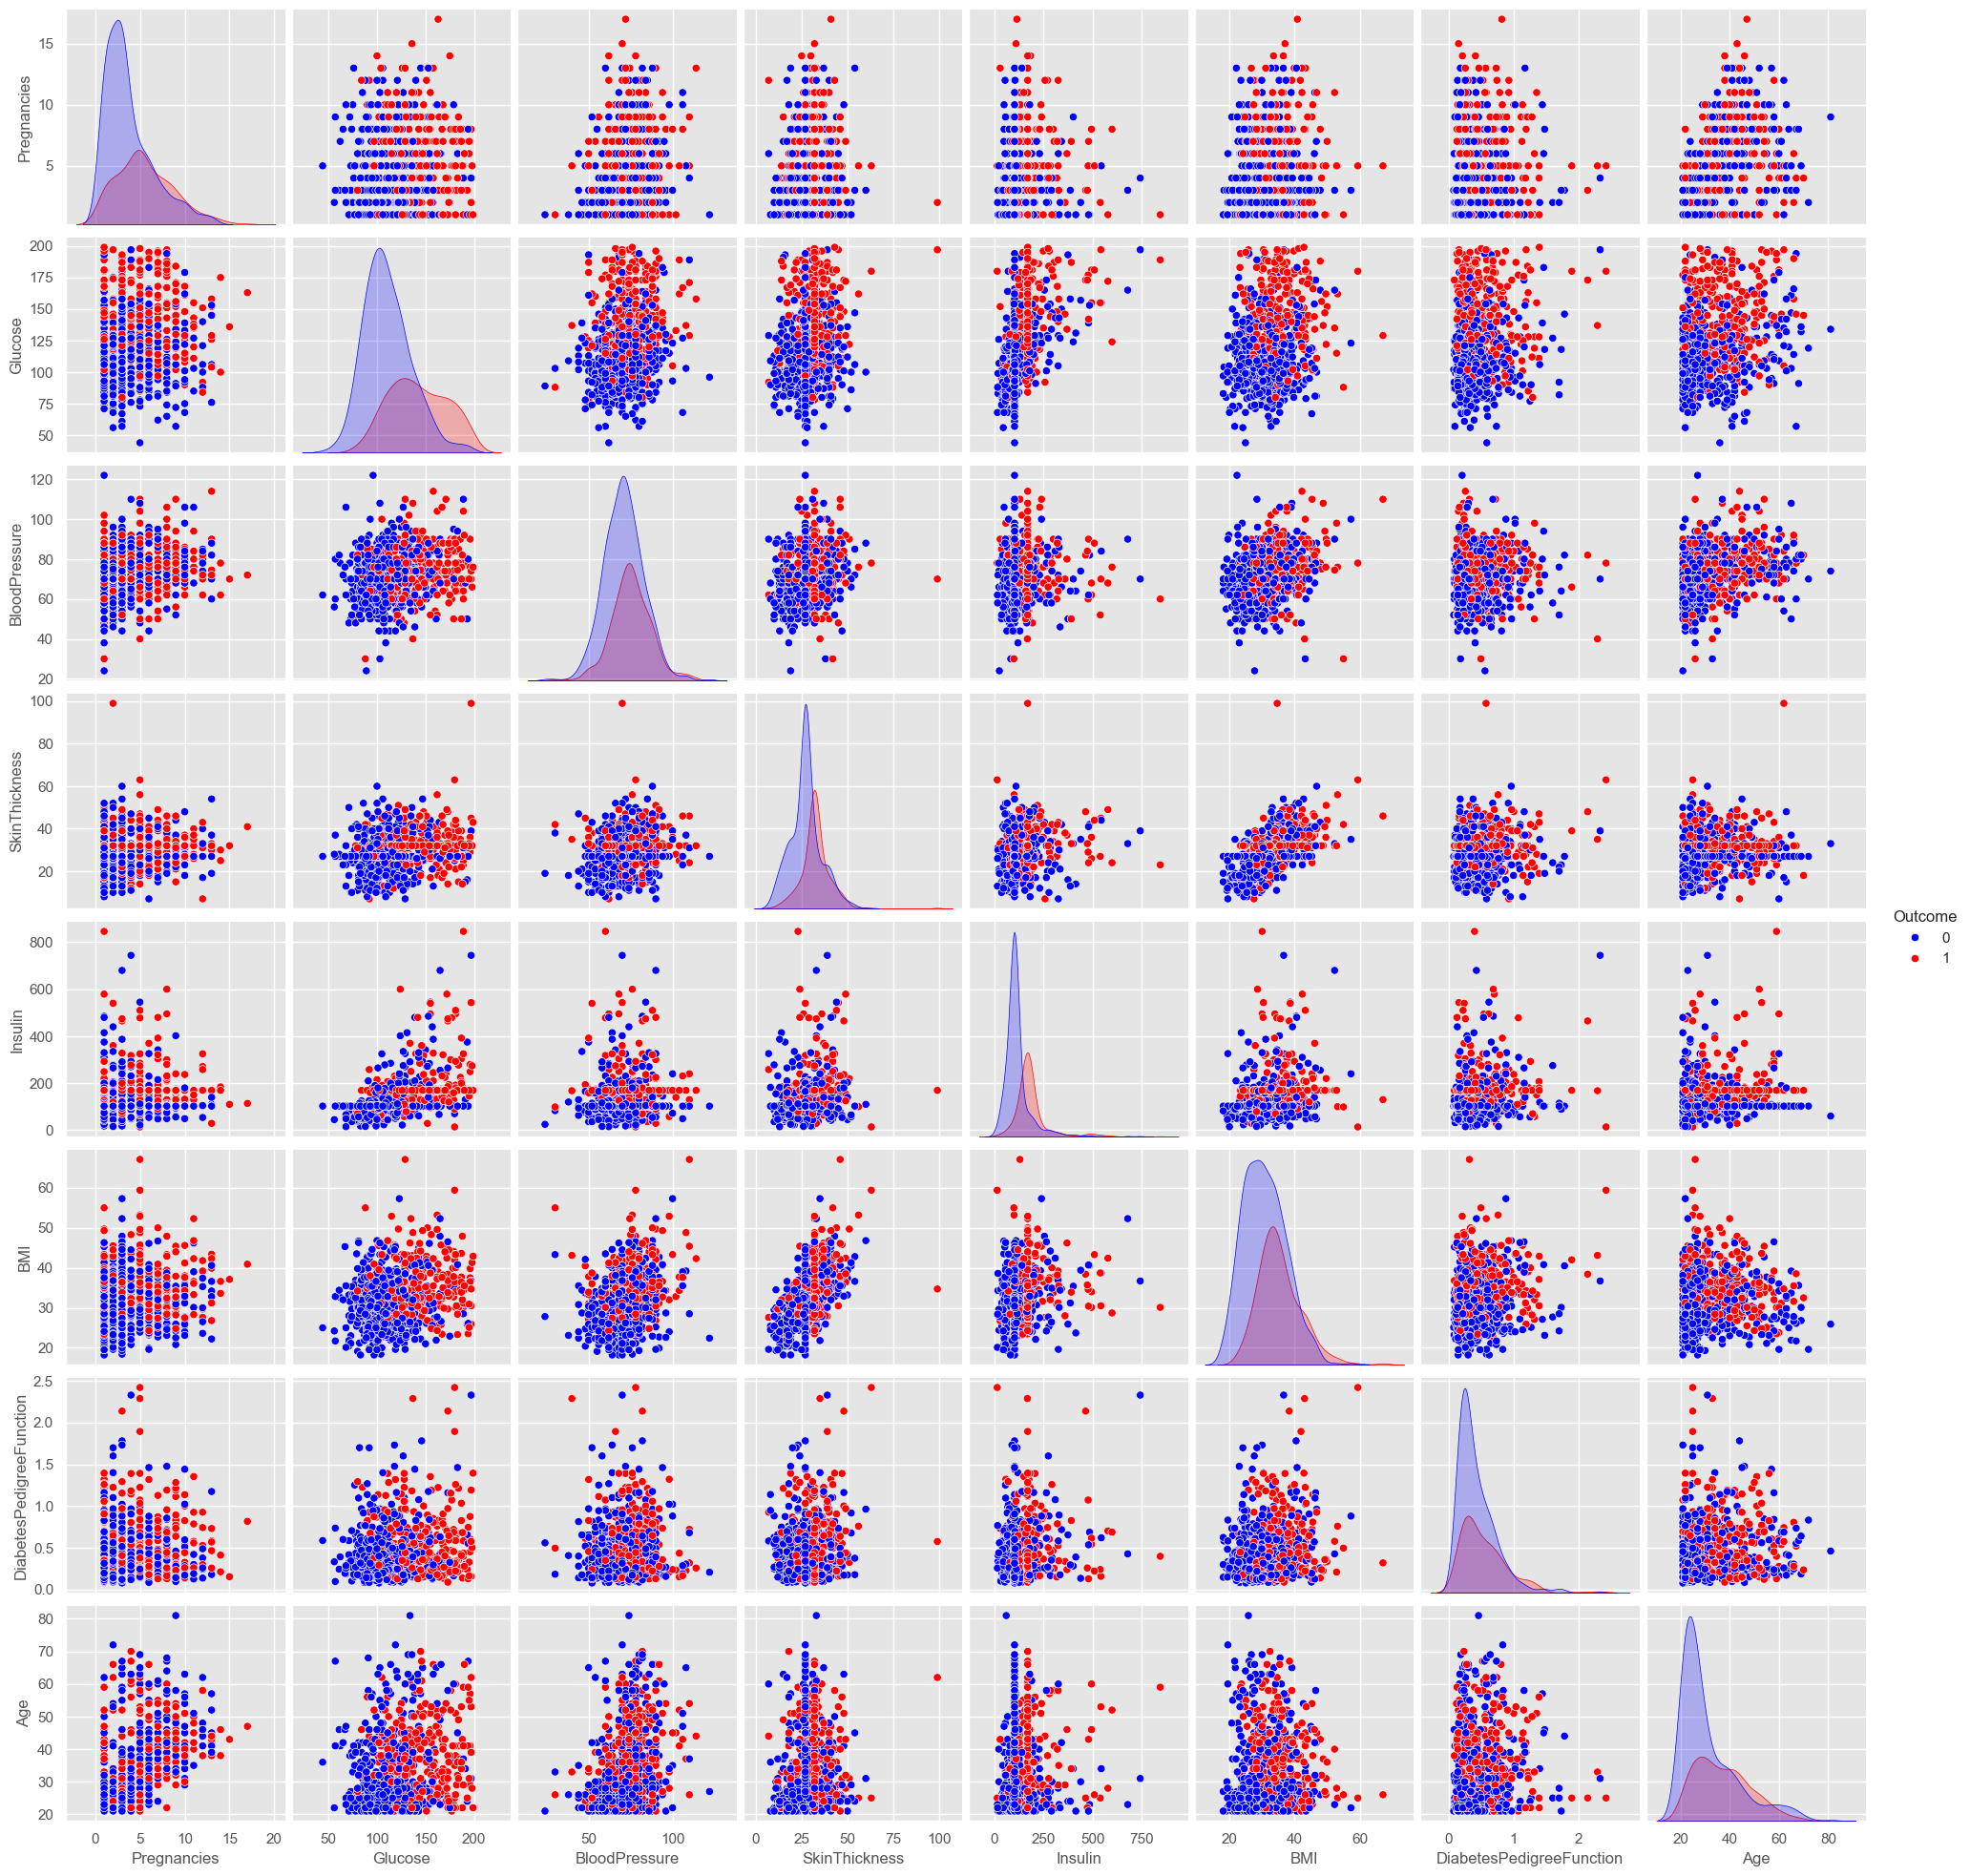

In [701]:
sns.pairplot(df, hue='Outcome', palette=['blue', 'red'])
plt.show()

In [702]:
# Outlier Detection
# IQR+Q1(inter quartile range)
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


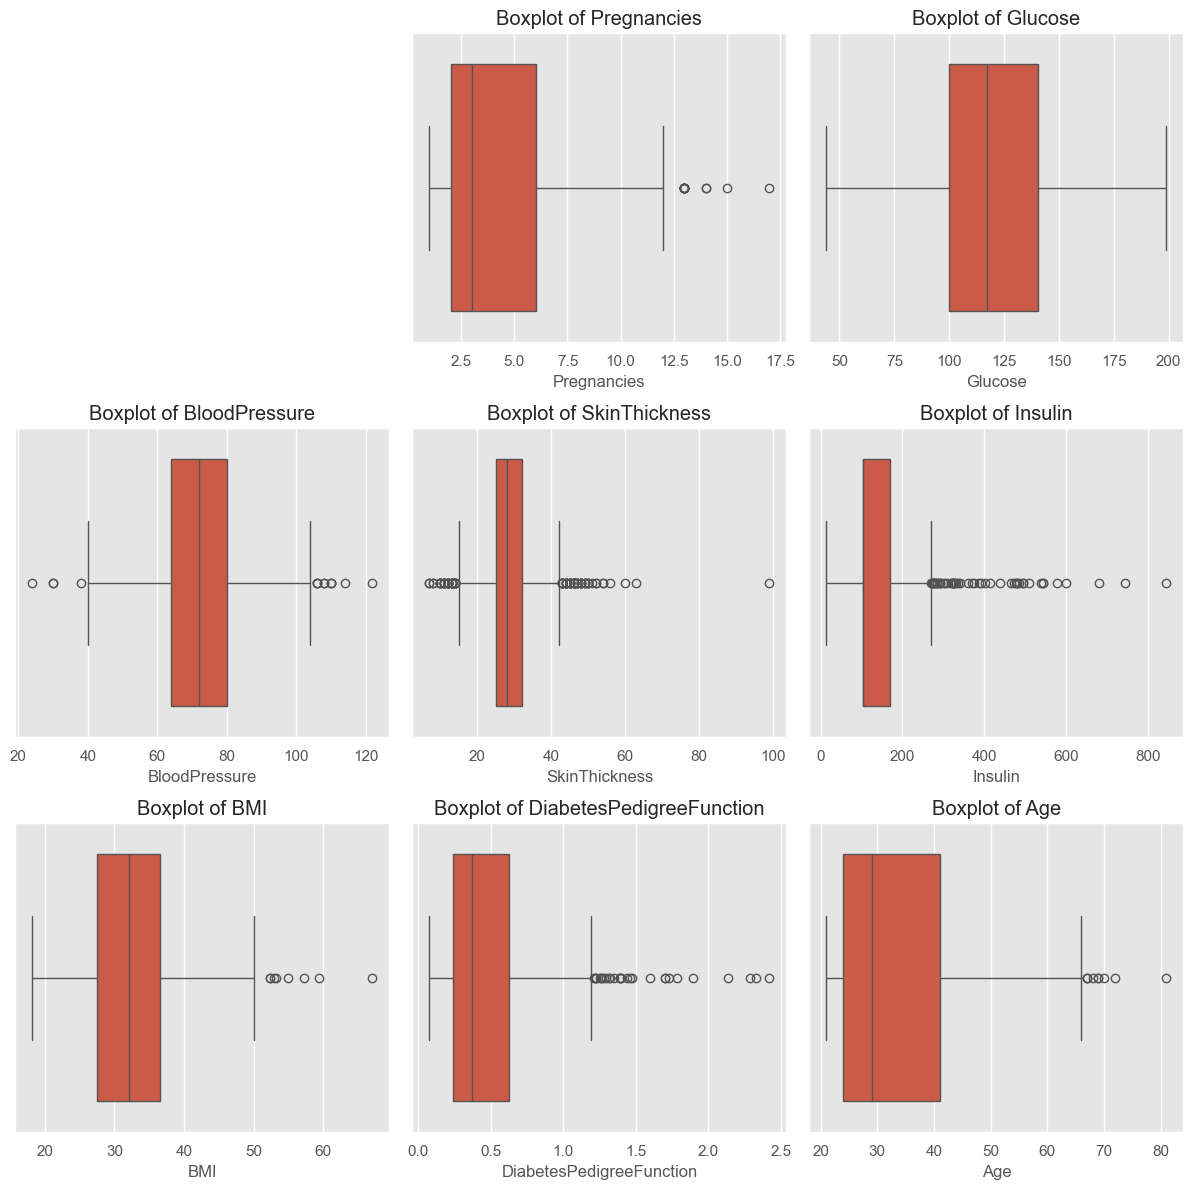

In [703]:
plt.figure(figsize=(12, 12))  
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(numerical_columns, 1):  # Enumerate starts at 1
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid for plots
    sns.boxplot(x= col, data =df)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
# here boxplot is drawn to check the outliers

In [704]:
Q1 = df.Pregnancies.quantile(0.25)
Q3 = df.Pregnancies.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Pregnancies']>upper, "Pregnancies"] = upper


In [705]:
Q1 = df.Glucose.quantile(0.25)
Q3 = df.Glucose.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Glucose']>upper, "Glucose"] = upper

In [706]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['BloodPressure']>upper, "BloodPressure"] = upper

In [707]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

In [708]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['SkinThickness']>upper, "SkinThickness"] = upper

In [709]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['BMI']>upper, "BMI"] = upper

In [710]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction']>upper, "DiabetesPedigreeFunction"] = upper

In [711]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Age']>upper, "Age"] = upper

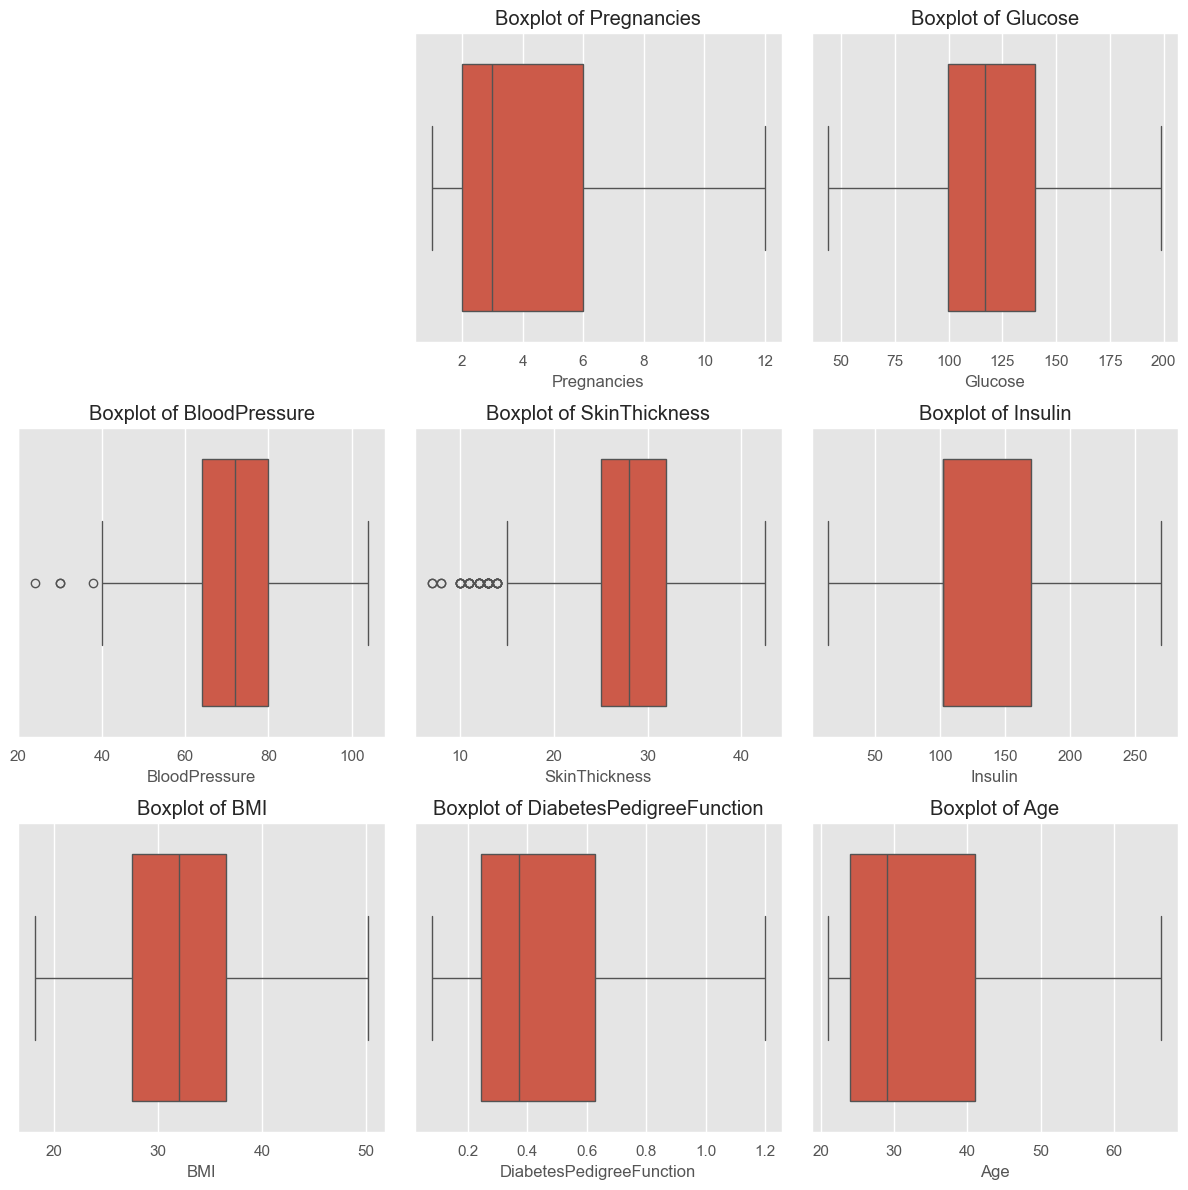

In [712]:
plt.figure(figsize=(12, 12))  
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(numerical_columns, 1):  # Enumerate starts at 1
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid for plots
    sns.boxplot(x= col, data =df)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [713]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=10)
outlier_labels = lof.fit_predict(df)

# Count normal vs outlier points
import numpy as np
unique, counts = np.unique(outlier_labels, return_counts=True)
dict(zip(unique, counts))


{np.int64(-1): np.int64(18), np.int64(1): np.int64(750)}

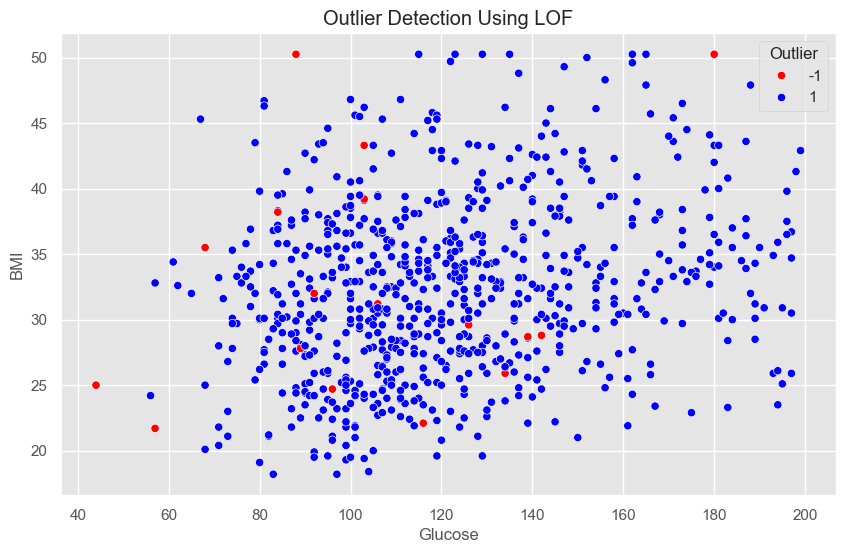

In [714]:
df['Outlier'] = outlier_labels  # Add labels to dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outlier'], palette={1: "blue", -1: "red"})
plt.title("Outlier Detection Using LOF")
plt.show()


In [715]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-2.24846728, -1.99285412, -1.95624233, -1.73550299, -1.72668616,
       -1.71052451, -1.68981922, -1.64768686, -1.64361813, -1.64061745,
       -1.6122343 , -1.60817405, -1.59873498, -1.59555813, -1.54817767,
       -1.5446637 , -1.52981312, -1.51361392, -1.49858168, -1.49211215])

In [716]:
thresold = np.sort(df_scores)[7]
thresold

outlier = df_scores>thresold
df = df[outlier]
df.shape

(760, 10)

# Feature Relationship Analysis
Pairwise Feature Analysis for Diabetes Risk: 
      Compare glucose, insulin, and BMI across Outcome groups.

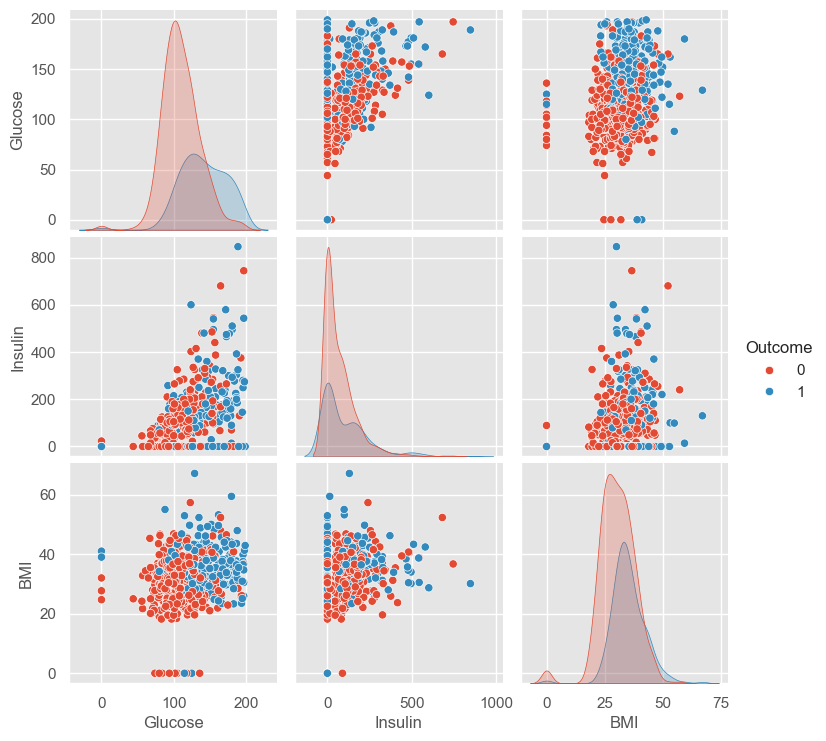

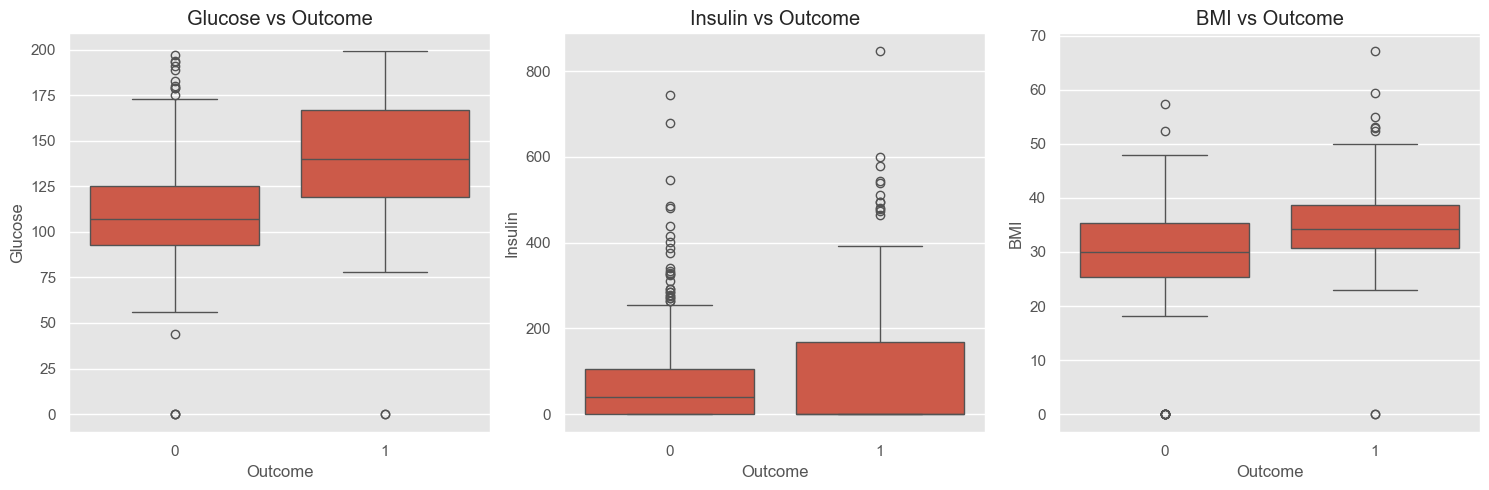

        Glucose                                                          \
          count        mean        std  min    25%    50%    75%    max   
Outcome                                                                   
0         500.0  109.980000  26.141200  0.0   93.0  107.0  125.0  197.0   
1         268.0  141.257463  31.939622  0.0  119.0  140.0  167.0  199.0   

        Insulin              ...                   BMI                       \
          count        mean  ...     75%    max  count       mean       std   
Outcome                      ...                                              
0         500.0   68.792000  ...  105.00  744.0  500.0  30.304200  7.689855   
1         268.0  100.335821  ...  167.25  846.0  268.0  35.142537  7.262967   

                                         
         min   25%    50%     75%   max  
Outcome                                  
0        0.0  25.4  30.05  35.300  57.3  
1        0.0  30.8  34.25  38.775  67.1  

[2 rows x 24 colu

In [717]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "diabetes.csv"  # Update if needed
df = pd.read_csv(file_path)

# Define features to analyze
features = ['Glucose', 'Insulin', 'BMI']

# Pairwise plots across Outcome groups
sns.pairplot(df, hue='Outcome', vars=features, diag_kind='kde')
plt.show()

# Boxplots for each feature against Outcome
def plot_boxplots(df, features):
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, len(features), i)
        sns.boxplot(x='Outcome', y=feature, data=df)
        plt.title(f'{feature} vs Outcome')
    plt.tight_layout()
    plt.show()

plot_boxplots(df, features)

# Statistical summary grouped by Outcome
summary_stats = df.groupby('Outcome')[features].describe()
print(summary_stats)


 Age vs. Diabetes Prevalence: 
 Check if older individuals have a higher risk. 


Percentage of Diabetics in Each Age Group:
AgeGroup
<30      21.212121
30-45    49.372385
45-60    56.435644
60+      28.125000
Name: Outcome, dtype: float64


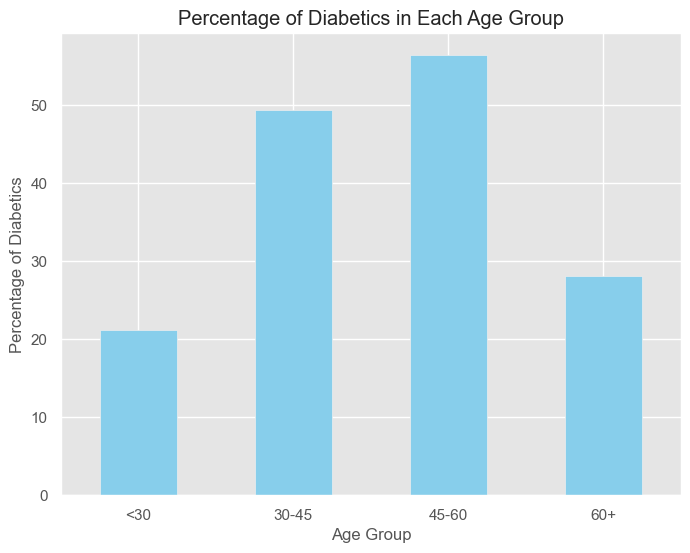

In [718]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "diabetes.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Ensure required columns exist
if 'Age' not in data.columns or 'Outcome' not in data.columns:
    raise ValueError("The dataset must contain 'Age' and 'Outcome' columns")

# Categorize age into bins
bins = [0, 30, 45, 60, float('inf')]
labels = ['<30', '30-45', '45-60', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Analyze the proportion of diabetics in each age group
age_group_analysis = data.groupby('AgeGroup')['Outcome'].mean() * 100
print("Percentage of Diabetics in Each Age Group:")
print(age_group_analysis)

# Plot age group trends
plt.figure(figsize=(8, 6))
age_group_analysis.plot(kind='bar', color='skyblue')
plt.title('Percentage of Diabetics in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Diabetics')
plt.xticks(rotation=0)
plt.show()


# 2. Diabetes Risk Factor Analysis 
Pregnancies vs. Diabetes Risk: 
 Check if more pregnancies increase diabetes likelihood. 


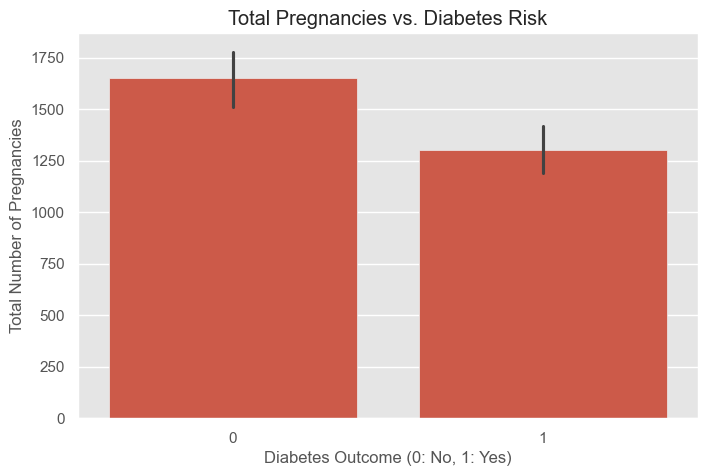

         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1        268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0


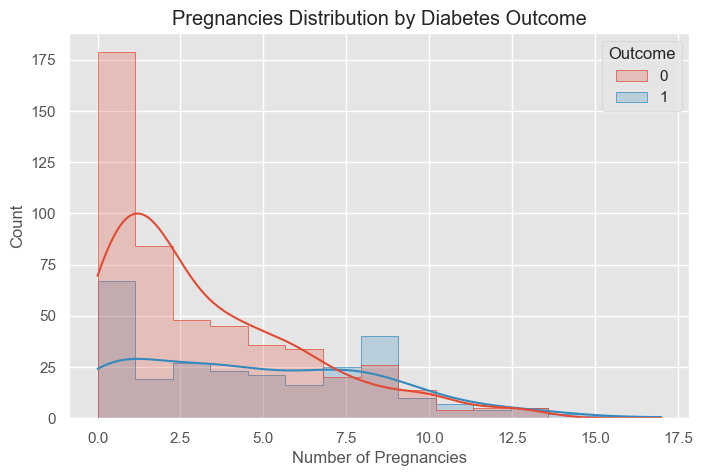

Correlation between Pregnancies and Diabetes Outcome:
             Pregnancies   Outcome
Pregnancies     1.000000  0.221898
Outcome         0.221898  1.000000


In [719]:
# Bar graph for Pregnancies vs. Outcome
plt.figure(figsize=(8, 5))
sns.barplot(x='Outcome', y='Pregnancies', data=df, estimator=sum)
plt.title('Total Pregnancies vs. Diabetes Risk')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Total Number of Pregnancies')
plt.show()

# Statistical summary grouped by Outcome
pregnancies_summary = df.groupby('Outcome')['Pregnancies'].describe()
print(pregnancies_summary)

# Histogram to show pregnancies distribution by Outcome
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Pregnancies', hue='Outcome', kde=True, bins=15, element='step')
plt.title('Pregnancies Distribution by Diabetes Outcome')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.show()

# Compute correlation between Pregnancies and Outcome
correlation = df[['Pregnancies', 'Outcome']].corr()
print("Correlation between Pregnancies and Diabetes Outcome:")
print(correlation)

 Glucose Level Threshold for Diabetes: 
○ Determine the glucose level cutoff where diabetes risk significantly increases.

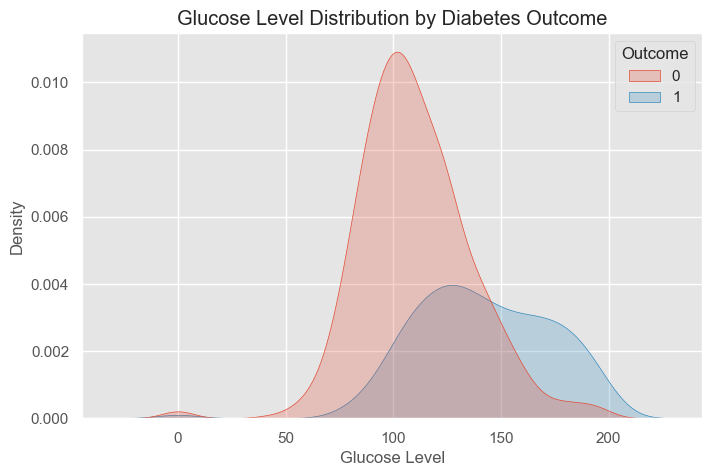

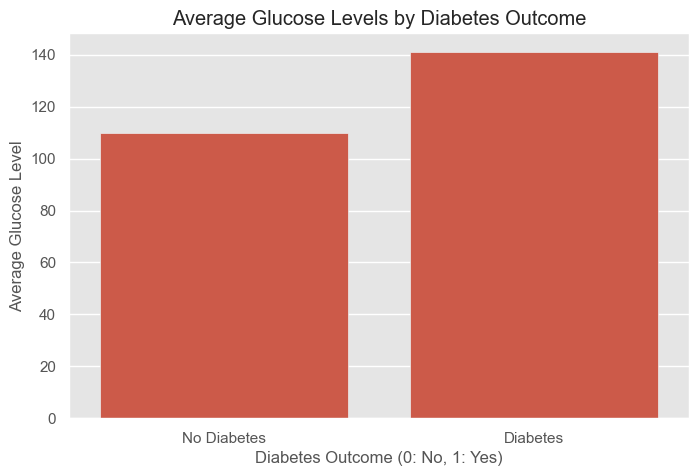

         count        mean        std  min    25%    50%    75%    max
Outcome                                                               
0        500.0  109.980000  26.141200  0.0   93.0  107.0  125.0  197.0
1        268.0  141.257463  31.939622  0.0  119.0  140.0  167.0  199.0
Suggested Glucose Level Threshold for Increased Diabetes Risk: 109.32


In [720]:
# KDE plot to visualize glucose distribution by Outcome
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Glucose', hue='Outcome', fill=True)
plt.title('Glucose Level Distribution by Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Density')
plt.show()

# Bar plot for average glucose levels by Outcome
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Outcome'], y=df['Glucose'], estimator=np.mean, ci=None)
plt.title('Average Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Average Glucose Level')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'])
plt.show()

# Statistical summary for Glucose by Outcome
glucose_summary = df.groupby('Outcome')['Glucose'].describe()
print(glucose_summary)

# Determine cutoff using mean and standard deviation
threshold = df[df['Outcome'] == 1]['Glucose'].mean() - df[df['Outcome'] == 1]['Glucose'].std()
print(f"Suggested Glucose Level Threshold for Increased Diabetes Risk: {threshold:.2f}")

Insulin Levels & Diabetes Prediction: 
 Compare insulin distribution in diabetic vs. non-diabetic patients. 

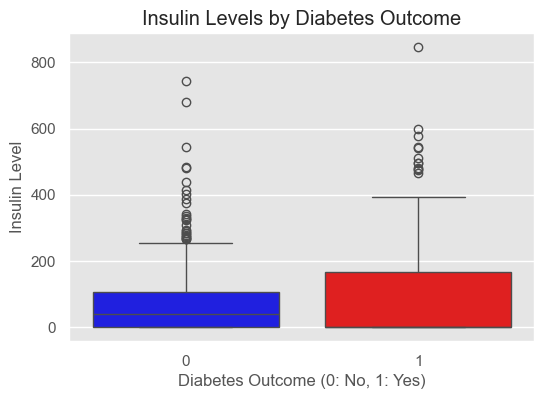

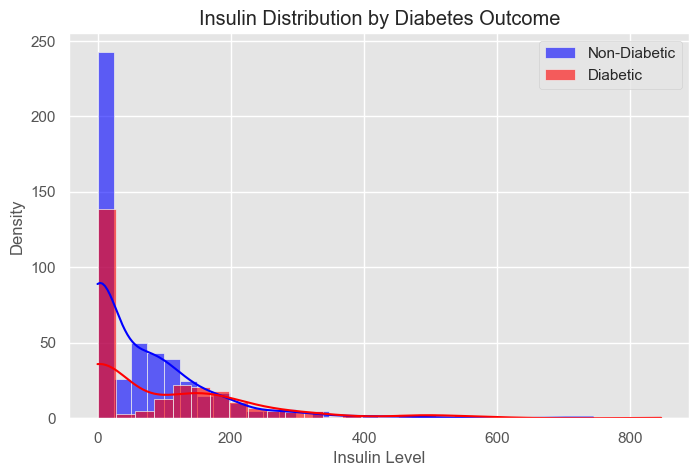

In [721]:
# Boxplot for Insulin levels by diabetes outcome
plt.figure(figsize=(6, 4))
sns.boxplot(x='Outcome', y='Insulin', data=df, palette=['blue', 'red'])
plt.title('Insulin Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Insulin Level')
plt.show()

# Histogram for Insulin distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Outcome'] == 0]['Insulin'], color='blue', label='Non-Diabetic', kde=True, bins=30, alpha=0.6)
sns.histplot(df[df['Outcome'] == 1]['Insulin'], color='red', label='Diabetic', kde=True, bins=30, alpha=0.6)
plt.title('Insulin Distribution by Diabetes Outcome')
plt.xlabel('Insulin Level')
plt.ylabel('Density')
plt.legend()
plt.show()


 Diabetes Pedigree Function (Genetic Risk) Impact: 
 Identify if a higher pedigree score increases risk.


Mean DPF for Non-Diabetic (0): 0.429734
Mean DPF for Diabetic (1): 0.5505


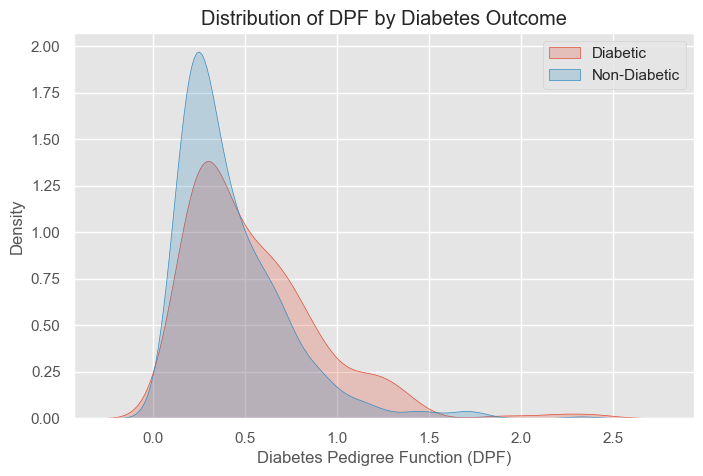

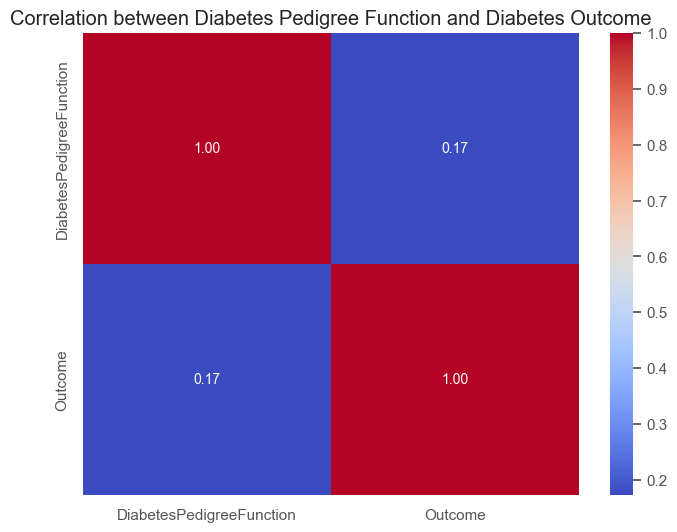

In [722]:
# Group by Outcome and calculate mean DPF
mean_dpf = df.groupby("Outcome")["DiabetesPedigreeFunction"].mean()
print("Mean DPF for Non-Diabetic (0):", mean_dpf[0])
print("Mean DPF for Diabetic (1):", mean_dpf[1])

# Plot distribution of DPF for diabetic vs. non-diabetic individuals
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Outcome"] == 1]["DiabetesPedigreeFunction"], label="Diabetic", fill=True)
sns.kdeplot(df[df["Outcome"] == 0]["DiabetesPedigreeFunction"], label="Non-Diabetic", fill=True)
plt.xlabel("Diabetes Pedigree Function (DPF)")
plt.ylabel("Density")
plt.title("Distribution of DPF by Diabetes Outcome")
plt.legend()
plt.show()


# Correlation heatmap to check impact of Diabetes Pedigree Function
plt.figure(figsize=(8, 6))
sns.heatmap(df[['DiabetesPedigreeFunction', 'Outcome']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Diabetes Pedigree Function and Diabetes Outcome')
plt.show()



# 3. Feature Engineering & Transformation
 Create Risk Categories for Glucose & BMI: 
 Low, Medium, High risk groups. 


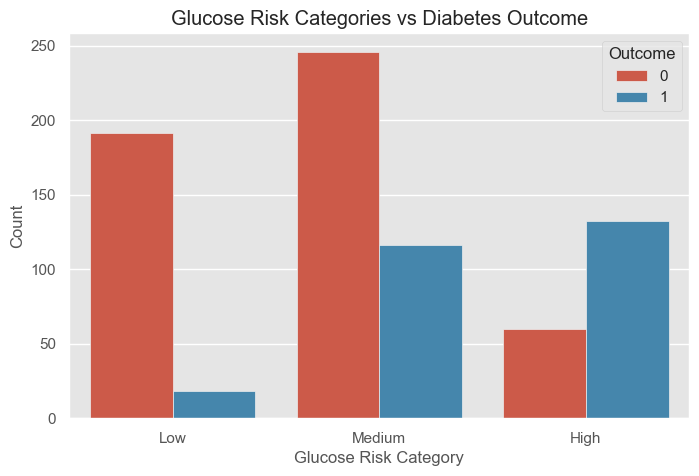

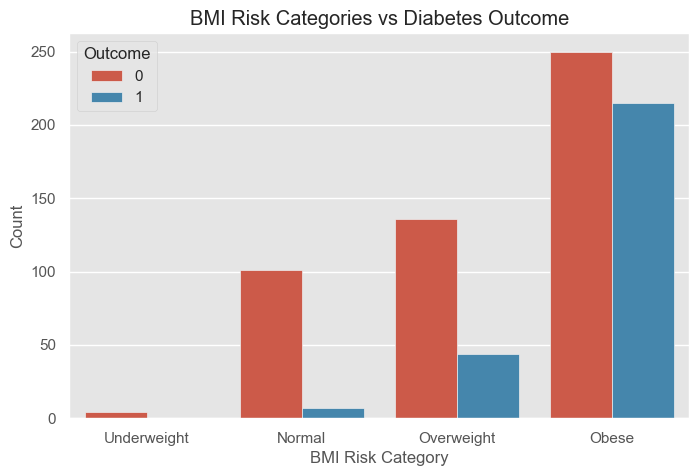

In [723]:
# Define risk categories for Glucose (Temporary)
bins_glucose = [0, 100, 140, np.inf]  # 0-99: Low, 100-139: Medium, 140+: High risk
labels_glucose = ['Low', 'Medium', 'High']
glucose_risk = pd.cut(df['Glucose'], bins=bins_glucose, labels=labels_glucose)

# Define risk categories for BMI (Temporary)
bins_bmi = [0, 18.5, 25, 30, np.inf]  # Underweight (<18.5), Normal (18.5-24.9), Overweight (25-29.9), Obese (30+)
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_risk = pd.cut(df['BMI'], bins=bins_bmi, labels=labels_bmi)

# Visualizing the distribution of Glucose Risk Categories against Diabetes Outcome
plt.figure(figsize=(8, 5))
sns.countplot(x=glucose_risk, hue='Outcome', data=df)
plt.title('Glucose Risk Categories vs Diabetes Outcome')
plt.xlabel('Glucose Risk Category')
plt.ylabel('Count')
plt.show()

# Visualizing the distribution of BMI Risk Categories against Diabetes Outcome
plt.figure(figsize=(8, 5))
sns.countplot(x=bmi_risk, hue='Outcome', data=df)
plt.title('BMI Risk Categories vs Diabetes Outcome')
plt.xlabel('BMI Risk Category')
plt.ylabel('Count')
plt.show()

Polynomial & Interaction Features: 
 Generate new features (e.g., glucose * BMI, insulin^2) to capture non-linear relationships. 

In [724]:
# Generate interaction features
df['Glucose_BMI'] = df['Glucose'] * df['BMI']

# Generate polynomial features
df['Insulin_Squared'] = df['Insulin'] ** 2

# Display the first few rows to confirm
print(df[['Glucose', 'BMI', 'Glucose_BMI', 'Insulin', 'Insulin_Squared']].head())


   Glucose   BMI  Glucose_BMI  Insulin  Insulin_Squared
0      148  33.6       4972.8        0                0
1       85  26.6       2261.0        0                0
2      183  23.3       4263.9        0                0
3       89  28.1       2500.9       94             8836
4      137  43.1       5904.7      168            28224


In [725]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_BMI  Insulin_Squared  
0                     0.627   50        1       4972.8                0  
1                     0.351   31        0       2261.0                0  
2                     0.672   32        1       4263.9                0  
3                     0.167   21        0       2500.9             8836  
4                     2.288   33        1       5904.7            28224

 Binning Age Groups: 
Create age groups (<30, 30-50, >50) to analyze diabetes trends.

In [726]:
# Binning Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['<30', '30-50', '>50'])

# Analyzing diabetes trends across age groups
age_group_trends = df.groupby('Age_Group')['Outcome'].mean()
print("Diabetes Prevalence by Age Group:")
print(age_group_trends)


# above code generates a new feature(column)ie age group 
# if not necessary we can remove it from this code


columns_to_remove = ['Age_Group']                                    
df = df.drop(columns=columns_to_remove, errors='ignore')

Diabetes Prevalence by Age Group:
Age_Group
<30      0.215827
30-50    0.518519
>50      0.469136
Name: Outcome, dtype: float64


In [727]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_BMI  Insulin_Squared  
0                     0.627   50        1       4972.8                0  
1                     0.351   31        0       2261.0                0  
2                     0.672   32        1       4263.9                0  
3                     0.167   21        0       2500.9             8836  
4                     2.288   33        1       5904.7            28224

# 4. Temporal & Cohort Analysis 
 Diabetes Prevalence by Age Cohort: 
 Compare diabetes rates across age groups.


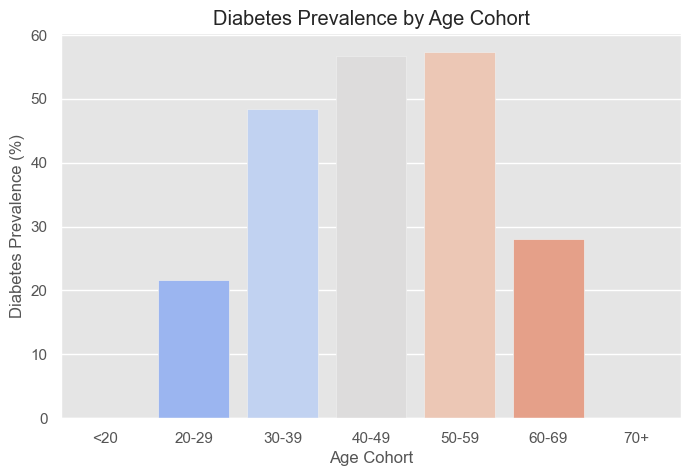

Age_Cohort
<20            NaN
20-29    21.582734
30-39    48.407643
40-49    56.637168
50-59    57.407407
60-69    28.000000
70+       0.000000
Name: Outcome, dtype: float64


In [728]:
# Define age cohorts
bins_age = [0, 20, 30, 40, 50, 60, 70, np.inf]  # Age groups: <20, 20-29, ..., 70+
labels_age = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age_Cohort'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

# Calculate diabetes prevalence per age cohort
age_cohort_prevalence = df.groupby('Age_Cohort')['Outcome'].mean() * 100  # Convert to percentage

# Bar plot for diabetes prevalence by age cohort
plt.figure(figsize=(8, 5))
sns.barplot(x=age_cohort_prevalence.index, y=age_cohort_prevalence.values, palette='coolwarm')
plt.title('Diabetes Prevalence by Age Cohort')
plt.xlabel('Age Cohort')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()

# Display prevalence values
print(age_cohort_prevalence)

Trend Analysis in Blood Sugar & BMI Across Age: 
 Identify how blood sugar and BMI evolve with age.


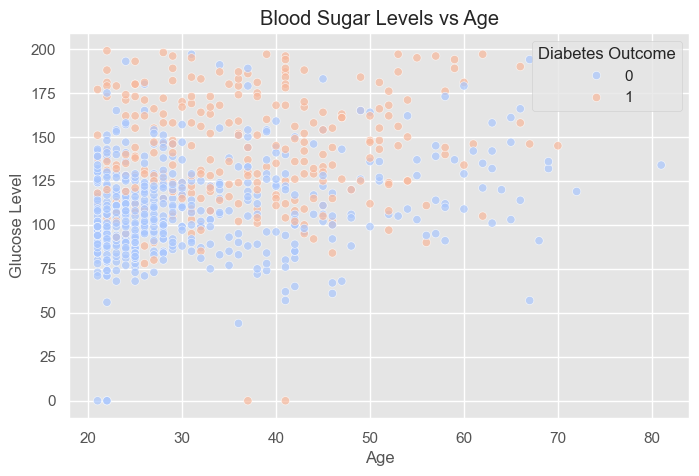

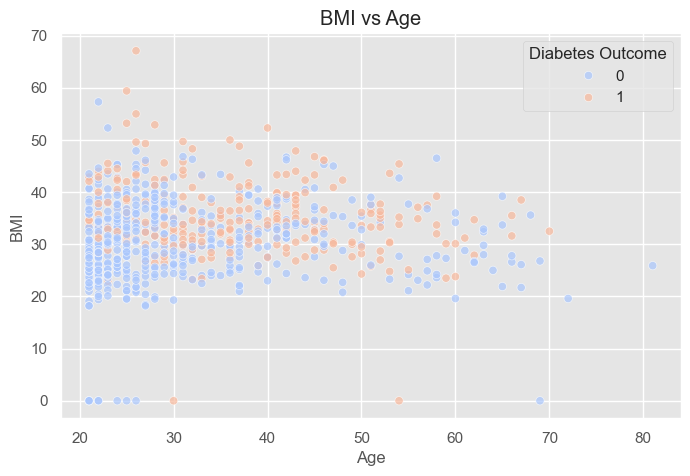

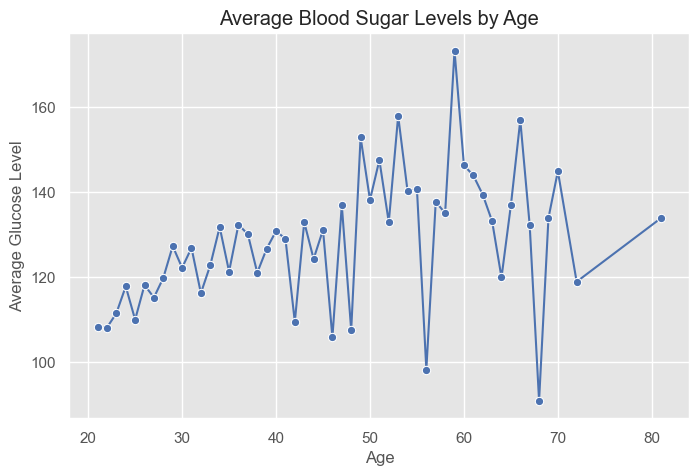

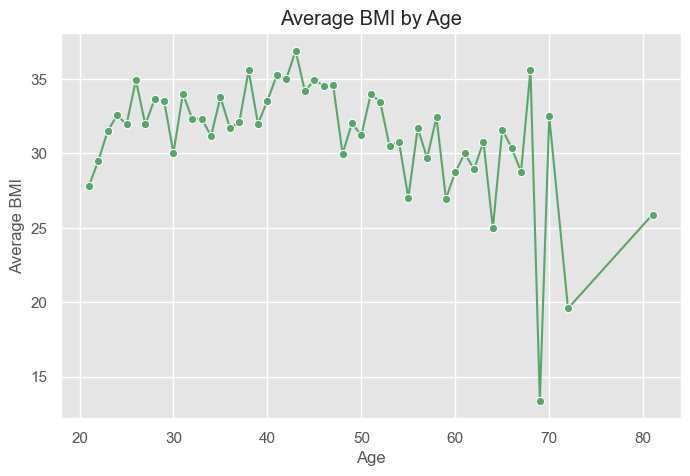

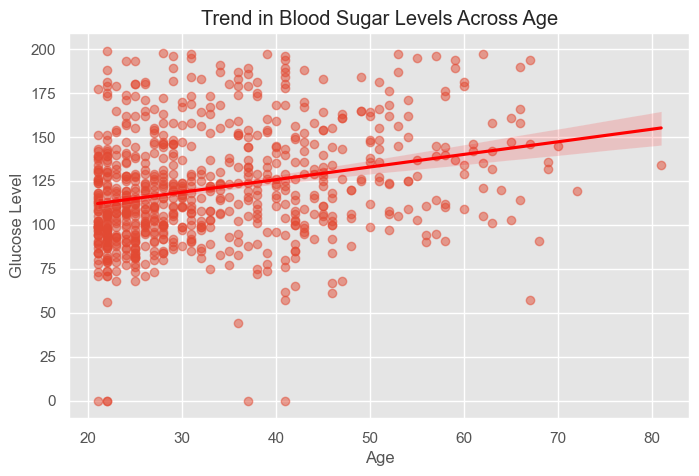

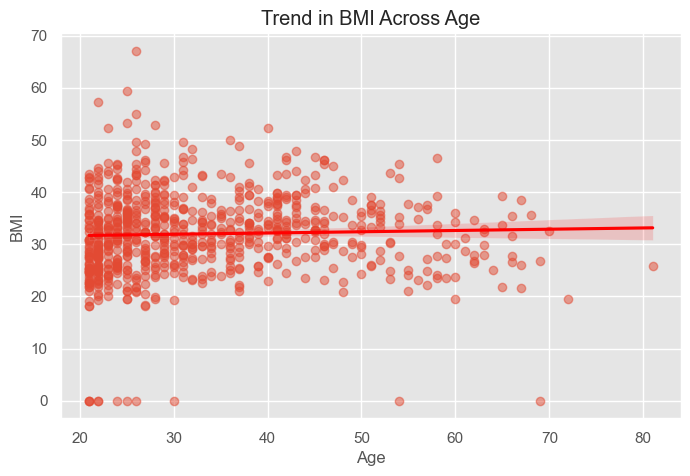

Summary Statistics for Glucose and BMI by Age:
        Glucose        BMI
Age                       
21   108.317460  27.817460
22   108.208333  29.509722
23   111.578947  31.502632
24   117.891304  32.569565
25   110.083333  31.943750


In [729]:
# Scatter plot for Blood Sugar (Glucose) vs. Age
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Glucose'], hue=df['Outcome'], palette='coolwarm', alpha=0.7)
plt.title('Blood Sugar Levels vs Age')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.legend(title='Diabetes Outcome')
plt.show()

# Scatter plot for BMI vs. Age
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['BMI'], hue=df['Outcome'], palette='coolwarm', alpha=0.7)
plt.title('BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Diabetes Outcome')
plt.show()

# Line plot to show average Blood Sugar (Glucose) changes with age
age_glucose = df.groupby('Age')['Glucose'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=age_glucose.index, y=age_glucose.values, marker='o', color='b')
plt.title('Average Blood Sugar Levels by Age')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.show()

# Line plot to show average BMI changes with age
age_bmi = df.groupby('Age')['BMI'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=age_bmi.index, y=age_bmi.values, marker='o', color='g')
plt.title('Average BMI by Age')
plt.xlabel('Age')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()

# Trend analysis with regression plots
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Glucose', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Trend in Blood Sugar Levels Across Age')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()

plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='BMI', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Trend in BMI Across Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# Display summary statistics
print("Summary Statistics for Glucose and BMI by Age:")
print(df[['Age', 'Glucose', 'BMI']].groupby('Age').mean().head())

In [730]:
y=df['Outcome']
X=df.drop(['Outcome'], axis=1)

In [731]:

cols = X.columns
index = X.index

In [732]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Glucose_BMI  Insulin_Squared Age_Cohort  
0                     0.627   50       4972.8                0      40-49  
1                     0.351   31       2261.0                0      30-39  
2                     0.672   32       4263.9                0      30-39  
3                     0.167   21       2500.9             8836      20-29  
4                     2.288   33       5904.7            28224      30-39

In [733]:
columns_to_remove = ['Age_Cohort']
df = df.drop(columns=columns_to_remove, errors='ignore')

In [734]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_BMI  Insulin_Squared  
0                     0.627   50        1       4972.8                0  
1                     0.351   31        0       2261.0                0  
2                     0.672   32        1       4263.9                0  
3                     0.167   21        0       2500.9             8836  
4                     2.288   33        1       5904.7            28224

In [735]:
print(X.dtypes)  # Check data types of all columns
print(X.head())  # See if any columns contain non-numeric values


Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Glucose_BMI                  float64
Insulin_Squared                int64
Age_Cohort                  category
dtype: object
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Glucose_BMI  Insulin_Squared Age_Cohort  
0                     0.627   50       4972.8                0      40

# FEATURE SELECTION & MODEL TRAINING

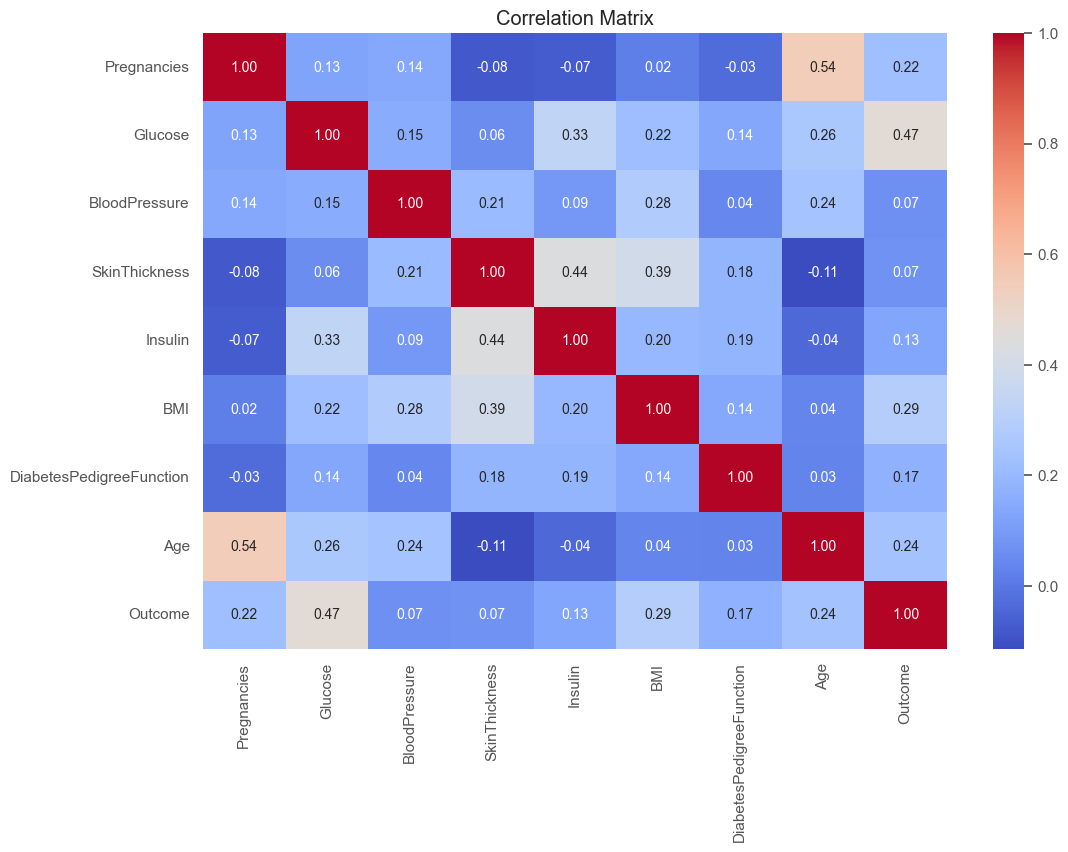

Selected Features from Chi-Square Test: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
Explained Variance Ratio by PCA: [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305]
Classification Metrics:
Accuracy: 0.7208, Precision: 0.6071, Recall: 0.6182, F1-Score: 0.6126


In [736]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (replace this with your actual dataset loading)
df = pd.read_csv("diabetes.csv")  # Update with your actual dataset
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target variable

# ------------------- Feature Selection Methods -------------------

## 1. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 2. Chi-Square Test (for categorical targets)
X_chi2 = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_new = X_chi2.fit_transform(X, y)
selected_features = X.columns[X_chi2.get_support()]
print("Selected Features from Chi-Square Test:", selected_features.tolist())

## 3. Principal Component Analysis (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize data before PCA
pca = PCA(n_components=5)  # Choose top 5 principal components
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio by PCA:", pca.explained_variance_ratio_)

# ------------------- Train-Test Split -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- Model Training -------------------

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Classification Metrics:\nAccuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")



Testing models on the basis of classificaton metrics.


In [737]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [738]:
y_pred = log_reg.predict(X_test)  # Make predictions on test data
print(log_reg.score(X_test, y_test))  # Get model accuracy


0.7467532467532467


In [739]:

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [740]:

confusion_matrix(y_test, y_pred)

array([[78, 21],
       [18, 37]])

In [741]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [742]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [743]:
y_pred = rand_clf.predict(X_test)

In [744]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.993485342019544
0.7597402597402597
[[79 20]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [745]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [746]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [747]:

grid_search_gbc.best_score_

np.float64(0.7865415124272871)

In [748]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [749]:

gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9462540716612378
0.7207792207792207
[[74 25]
 [18 37]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



In [750]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
1      Random Forest Classifier  75.97
0           Logistic Regression  74.68
2  Gradient Boosting Classifier  72.08

In [751]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

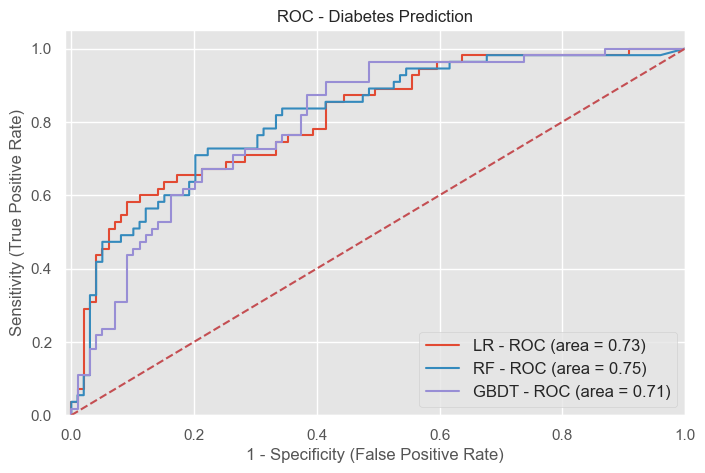

In [752]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},

{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[74.68, 75.97, 72.08]
[np.float64(73.03), np.float64(76.67), np.float64(71.00999999999999)]


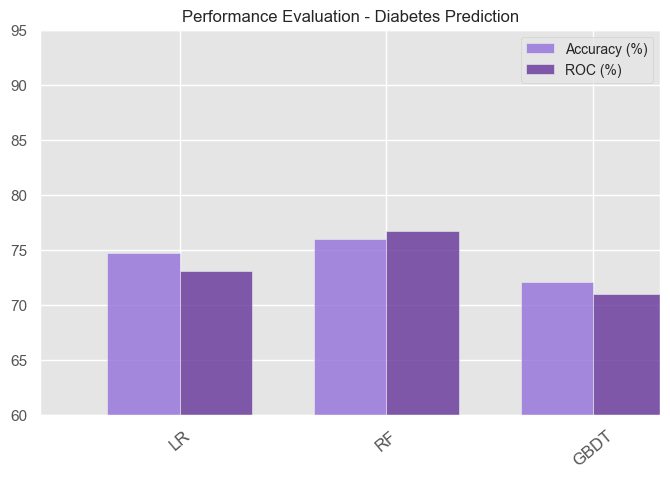

[75.32, 76.62, 72.08]

In [753]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your trained models and accuracy values
models = [
    {
        'label': 'LR',
        'model': log_reg,
    },
    {
        'label': 'RF',
        'model': rand_clf,
    },
    {
        'label': 'GBDT',
        'model': gbc,
    }
]

means_roc = []
means_accuracy = [100 * round(log_reg_acc, 4), 100 * round(rand_acc, 4), 100 * round(gbc_acc, 4)]

# Calculate ROC and Accuracy for each model
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute ROC curve
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = metrics.roc_auc_score(y_test, y_pred)
    auc = 100 * round(auc, 4)
    means_roc.append(auc)

# Print accuracy and ROC values
print(means_accuracy)
print(means_roc)

# Adjust the number of groups to match the number of models (3 in this case)
n_groups = len(models)
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

# Plot the accuracy values
rects1 = plt.bar(index, means_accuracy, bar_width,
                 alpha=opacity, color='mediumpurple', label='Accuracy (%)')

# Plot the ROC values
rects2 = plt.bar(index + bar_width, means_roc, bar_width,
                 alpha=opacity, color='rebeccapurple', label='ROC (%)')

# Adjust axis limits and labels
plt.xlim([-0.5, n_groups - 0.5])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index + bar_width / 2, ('LR', 'RF', 'GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)

# Save the plot as a high-quality image
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()
[75.32, 76.62, 72.08]